<a href="https://colab.research.google.com/github/ShivinM-17/ANN-implementation-notebook/blob/main/ANN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


IMPORT LIBRARIES

In [1]:
!pip install tensorflow-gpu==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 95.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 113.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.0
    Uninstalling tensorboard-data-server-0.7.0:
      Successfully uninstalled tensorboard-data-server-0.7.0
  Attempting uninstall: google-auth-oauthlib
    F

In [2]:
import tensorflow as tf

print(tf.__version__)


2.8.0


**This version has KERAS integrated into it**

In [3]:
#import basic librarires

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [6]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**THIS IS A BINARY CLASSIFICATION PROBLEM**

In [7]:
## Divide the dataset into independent and dependent features
### Exited -> dependent feature
### Rest -> independent feature

# Independent features
X = dataset.iloc[:,3:13]

# Dependent features
y = dataset.iloc[:,13]

In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

**FEATURE ENGINEERING**

In [10]:
# Processing the categorical features

# Doing for geography 
geography = pd.get_dummies(X['Geography'],drop_first=True)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [11]:
# Doing for gender
gender = pd.get_dummies(X['Gender'],drop_first=True)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [12]:
## Concatenate geography and gender made above, and drop their corresponding features

# Dropping the columns 
X = X.drop(['Geography','Gender'],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [13]:
# Now concatenating the columns
X = pd.concat([X,geography,gender],axis=1)

In [14]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


**DOING TRAIN-TEST-SPLIT**

In [15]:
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=34)

In [16]:
# Feature Scaling 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_train

array([[-1.51737124,  0.68722156, -1.04075851, ..., -0.57292385,
         1.73032049, -1.09969743],
       [ 0.09062759,  2.69430085, -0.34913845, ..., -0.57292385,
        -0.57792762,  0.90934104],
       [-1.79747427,  1.83412401,  1.03410167, ...,  1.74543266,
        -0.57792762, -1.09969743],
       ...,
       [-0.79117822, -0.45968089, -0.00332842, ..., -0.57292385,
         1.73032049,  0.90934104],
       [-0.55257194,  0.59164636,  0.68829164, ..., -0.57292385,
        -0.57792762,  0.90934104],
       [ 0.04913085,  0.11377033, -1.73237857, ...,  1.74543266,
        -0.57792762, -1.09969743]])

In [18]:
X_test

array([[-0.50070101, -0.6508313 ,  0.68829164, ...,  1.74543266,
        -0.57792762,  0.90934104],
       [-0.85342334,  0.49607115,  0.68829164, ..., -0.57292385,
        -0.57792762, -1.09969743],
       [-0.49032683, -0.36410569, -1.38656854, ...,  1.74543266,
        -0.57792762,  0.90934104],
       ...,
       [ 0.2358662 ,  1.92969922, -1.73237857, ..., -0.57292385,
        -0.57792762,  0.90934104],
       [ 0.4537241 ,  0.30492074, -0.69494848, ..., -0.57292385,
        -0.57792762,  0.90934104],
       [-0.38658497, -0.84198171,  1.3799117 , ..., -0.57292385,
         1.73032049,  0.90934104]])

In [19]:
X_train.shape

(8000, 11)

**NOW CREATING THE ANN MODEL**

In [20]:
# Importing Sequential, if we want to take an entire neural network
# as a block, we import this. Then we'll be able to do forward and 
# backward propagatiom
from tensorflow.keras.models import Sequential

# Importing Dense, using this we'll be able to create the input layers,
# the hidden layers, and the output layers
from tensorflow.keras.layers import Dense

# Importing the activation functions that will be applied into the 
# different layers of the neural networks
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU

# Sometimes, while doing the forward and backward propagation,
# and some other functions on the network, we get an overfitting case,
# wherein we get Good Accuracy for train data, while bad accuracy for the test data
# Therfore, to reduce this, we introduce a dropout layer, which is filled with 
# regularisation parameters (eg. L1 and L2, ridge, Lasso).
# According to these parameters, that much percentage of entire neurons in a layer
# will get deactivated while training
# Suppose, Dropout estimate = 0.3, then 30% of entire neurons of a layer will be 
# deactivated, thus reducing the overfitting 
from tensorflow.keras.layers import Dropout

In [37]:
# Now, initialising the ANN

classifier = Sequential()

In [38]:
# Adding the input layer
classifier.add(Dense(units=11, activation='relu'))

# Here, we added 11 input nodes, and applying ReLU activation function to next layer

In [39]:
# Adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))

# Also, add an dropout estimate to this hidden layer
# Sometimes, our neural netowrk tend to overfit.
# To overcome this, we drop/ remove the nodes of that layer.
# Eg - suppose the dropout estimate = 0.3. then 30% of the total nodes of that
# layer will be removed and the network will be arranged accordingly

classifier.add(Dropout(0.3))

In [40]:
# Adding the seconf hidden layer
classifier.add(Dense(units=6, activation='relu'))

# Now, adding an dropout layer
classifier.add(Dropout(0.2))

In [41]:
# Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [42]:
# Now, we will compile the whole model using the network and optimizer
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','r2_score'])

In [43]:
# Now, we will initialise the learning rate in the optimizer
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

# Now, compile the model using the opt optimizer made above
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Now, we train our neural network
# model_history = classifier.fit(X_train,
#                                y_train,
#                                validation_split=0.33,
#                                batch_size=10,
#                                epochs=1000)
# Since, we have 1000 epochs, this model will train on each of the epochs, thus 
# taking a lot of time. Also, we can see that at some point of time, the accuracy
# starts to stagnate (here, its around 86% accuracy)
# Thus, a early stopping mechanism is required, which will stop the training 
# once the accuracy stops increasing/ starts stagnating at a particular value

In [44]:
# Applying an Early stopping mechanism for training the model
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    restore_best_weights=False,
)

In [45]:
# Now, we train our neural network again with early stopping
model_history = classifier.fit(X_train,
                               y_train,
                               validation_split=0.33,
                               batch_size=10,
                               epochs=1000,
                               callbacks=early_stopping
                               )

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.4672 - accuracy: 0.7953 - val_loss: 0.4371 - val_accuracy: 0.8031
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4296 - accuracy: 0.7979 - val_loss: 0.4108 - val_accuracy: 0.8031
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4145 - accuracy: 0.7979 - val_loss: 0.4058 - val_accuracy: 0.8031
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4059 - accuracy: 0.7979 - val_loss: 0.3910 - val_accuracy: 0.8031
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4022 - accuracy: 0.8005 - val_loss: 0.3871 - val_accuracy: 0.8031
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4052 - accuracy: 0.8102 - val_loss: 0.3877 - val_accuracy: 0.8031
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3981 - accuracy: 0.8031 - val_loss: 0.4104 - val_accuracy:

In [46]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

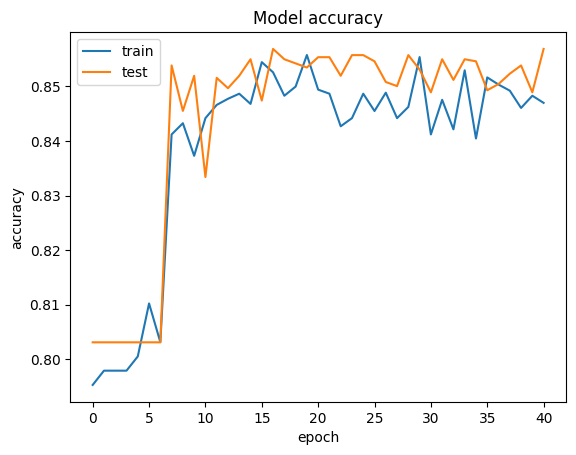

In [53]:
# Now, plotting the history of the changing accuracy of our model till early stopping
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

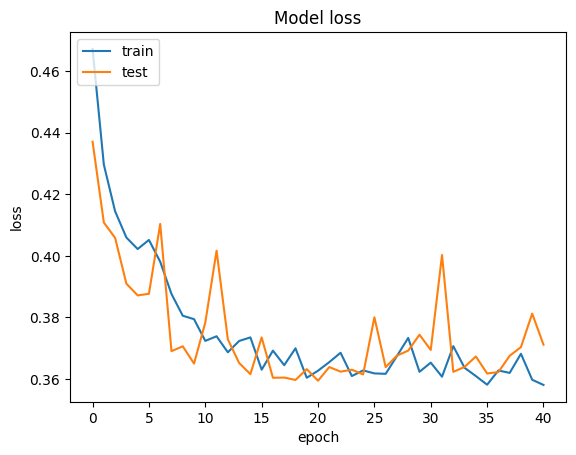

In [48]:
# Now, plotting the history of the changing accuracy of our model till early stopping
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [49]:
# Now, predicting and evaluating the model after training it

# Predicting thr test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

In [50]:
# Now, making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1505,   61],
       [ 240,  194]])

In [51]:
# now, calculating the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.8495

In [52]:
# Let's see how can we get the updated weights of our neural network
classifier.get_weights()

[array([[ 2.3026599e-01, -3.4286857e-01, -9.6330965e-01, -7.9765433e-01,
         -1.4948986e-01, -5.8621734e-01,  1.8785674e-02, -8.3744282e-01,
         -1.3688675e-01,  1.6663508e-02,  8.4906632e-01],
        [ 3.0008057e-01, -3.8933978e+00, -1.0341382e+00, -2.0477233e+00,
          6.5604448e-01, -1.8577148e+00, -3.2545257e+00,  2.3633511e+00,
          2.2052615e+00,  5.5147488e-02, -9.2904842e-01],
        [-1.2604207e-01, -5.3208633e-03, -5.5772536e-02,  1.5951257e+00,
          2.7797362e-01, -4.7151744e-01, -5.4028898e-02, -1.3760592e+00,
          1.2015047e-01, -2.3230452e-03,  1.6140236e-01],
        [ 8.7777406e-01,  1.2358746e-01, -3.9252676e-02,  8.4497076e-01,
         -1.1987066e+00,  9.1307175e-01, -4.4537795e-01, -1.2941588e-01,
         -1.3612904e-01, -2.6576129e-01, -1.3447675e+00],
        [ 3.9607823e+00, -5.2351773e-01, -3.5233453e-02,  3.6153910e-01,
         -3.4461975e+00, -3.9760518e-01,  3.2334813e-01, -6.3895449e-02,
         -3.2737184e-01, -2.3470948e-0